In [430]:
import os
import re
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import shapely
from shapely import Polygon, Point, STRtree
from shapely.wkt import dumps, loads

from mip.utils import extract_ome_tiff

In [374]:
# directory = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/Point2303'
directory = '/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/htan_v1/HT206B1-H1'

In [431]:
region_mask = tifffile.imread(os.path.join(directory, 'inputs', 'ductal_mask.tif'))
channel_to_img = extract_ome_tiff(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/HT206B1-H1/level_2/HT206B1-H1.ome.tiff',
    ['SMA', 'Pan-CK']
)

In [376]:
region_to_geoms = json.load(open(os.path.join(directory, 'outputs', 'grid_polygons.json')))
region_to_masks = np.load(os.path.join(directory, 'outputs', 'regions.npy'), allow_pickle=True)[()]
region_to_grid = np.load(os.path.join(directory, 'outputs', 'grid_regions.npy'), allow_pickle=True)[()]

metric_df = pd.read_csv(os.path.join(directory, 'outputs', 'region_metrics.txt'), sep='\t', index_col=0)
region_to_bbox = {region_id: (r1, c1, r2, c2)
                  for region_id, r1, c1, r2, c2 in zip(metric_df.index, metric_df['boundary_bbox-0'], metric_df['boundary_bbox-1'], metric_df['boundary_bbox-2'], metric_df['boundary_bbox-3'])}


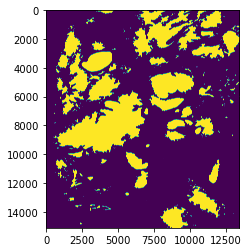

In [377]:
plt.imshow(region_mask)

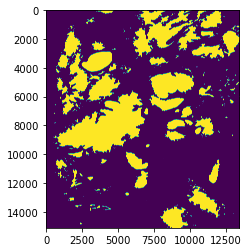

In [378]:
plt.imshow(region_to_masks['region']['mask'])

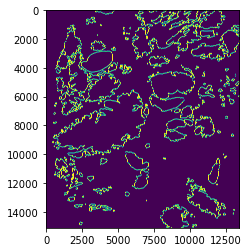

In [379]:
plt.imshow(region_to_masks['myoepi']['mask'])

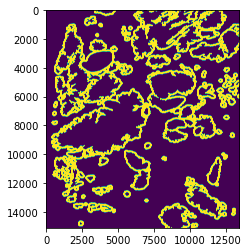

In [380]:
plt.imshow(region_to_masks['boundary']['mask'])

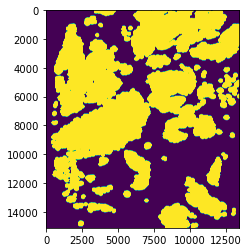

In [381]:
plt.imshow(region_to_masks['expanded']['mask'])

In [424]:
region_id = 200
r1, c1, r2, c2 = region_to_bbox[region_id]
r1, r2, c1, c2

(7265, 7527, 10908, 11086)

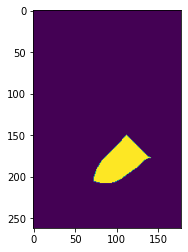

In [425]:
plt.imshow(region_to_masks['region']['labeled'][r1:r2, c1:c2]==region_id)

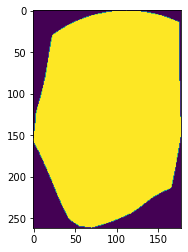

In [426]:
plt.imshow(region_to_masks['expanded']['labeled'][r1:r2, c1:c2]==region_id)

In [427]:
region_to_grid[region_id]

{'grid_binary_positive_regions': {'SMA': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
  'Podoplanin': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
  'combined': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int32)},
 'grid_labeled_regions_filtered': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0

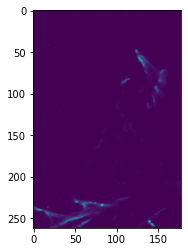

In [432]:
plt.imshow(channel_to_img['SMA'][r1:r2, c1:c2])

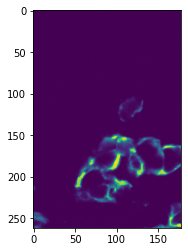

In [433]:
plt.imshow(channel_to_img['Pan-CK'][r1:r2, c1:c2])

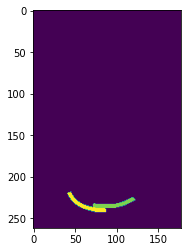

In [428]:
plt.imshow(region_to_grid[region_id]['grid_binary_positive_regions']['SMA'])

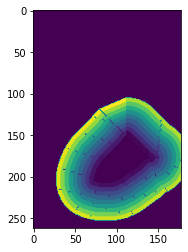

In [429]:
plt.imshow(region_to_grid[region_id]['grid_labeled_regions_filtered'])

In [359]:
sorted(metric_df.columns)

['boundary_area',
 'boundary_bbox-0',
 'boundary_bbox-1',
 'boundary_bbox-2',
 'boundary_bbox-3',
 'boundary_cell_type_APC_cell_fraction',
 'boundary_cell_type_DC_cell_fraction',
 'boundary_cell_type_ENDO_cell_fraction',
 'boundary_cell_type_FIBRO_VIMonly_cell_fraction',
 'boundary_cell_type_IMMUNEOTHER_cell_fraction',
 'boundary_cell_type_MACS_cell_fraction',
 'boundary_cell_type_MAST_cell_fraction',
 'boundary_cell_type_MONO_cell_fraction',
 'boundary_cell_type_MYOEP_cell_fraction',
 'boundary_cell_type_MYOFIBRO_cell_fraction',
 'boundary_cell_type_NEUT_cell_fraction',
 'boundary_cell_type_NORMFIBRO_cell_fraction',
 'boundary_cell_type_OTHER_cell_fraction',
 'boundary_cell_type_TUMOR_ECADCK_cell_fraction',
 'boundary_cell_type_TUMOR_EMT_cell_fraction',
 'boundary_cell_type_TUMOR_LUMINAL_cell_fraction',
 'boundary_centroid-0',
 'boundary_centroid-1',
 'boundary_compactness',
 'boundary_eccentricity',
 'boundary_extent',
 'boundary_intensity_overlap_PanKRT_SMA',
 'boundary_intensity_po

In [360]:
metric_df[[c for c in metric_df if 'intensity' in c]]

,region_intensity_positive_fraction_SMA,region_intensity_positive_fraction_PanKRT,region_intensity_overlap_PanKRT_SMA,myoepi_intensity_positive_fraction_SMA,myoepi_intensity_positive_fraction_PanKRT,myoepi_intensity_overlap_PanKRT_SMA,boundary_intensity_positive_fraction_SMA,boundary_intensity_positive_fraction_PanKRT,boundary_intensity_overlap_PanKRT_SMA,expanded_intensity_positive_fraction_SMA,expanded_intensity_positive_fraction_PanKRT,expanded_intensity_overlap_PanKRT_SMA,region_grid_metrics_SMA_mean_intensity
1,0.0,0.49399,0.0,0.063029,0.290501,0.019272,0.045631,0.090414,0.005998,0.015697,0.355163,0.002063,0.167544


In [361]:
metric_df

,region_bbox-0,region_bbox-1,region_bbox-2,region_bbox-3,region_area,region_perimeter,region_centroid-0,region_centroid-1,region_eccentricity,region_extent,...,region_grid_metrics_SMA_fraction_positive,region_grid_metrics_SMA_integrity,region_grid_metrics_SMA_mean_thickness,region_grid_metrics_SMA_mean_thickness_nonbreaks,region_grid_metrics_combined_num_pieces,region_grid_metrics_combined_overlap_fraction,region_grid_metrics_combined_fraction_positive,region_grid_metrics_combined_integrity,region_grid_metrics_combined_mean_thickness,region_grid_metrics_combined_mean_thickness_nonbreaks
1,217,477,1024,1024,344333,2464.111832,686.168793,788.143832,0.771303,0.780042,...,0.125,0.864286,1.192857,1.380165,9,0.125,0.125,0.864286,1.192857,1.380165


In [329]:
# tifffile.imsave('/diskmnt/Projects/Users/estorrs/sandbox/temp.tif',
#                 region_to_grid[region_id]['grid_labeled_regions_filtered']>0)

In [295]:
d = region_to_geoms[str(region_id)]['polygons_filtered']
d.keys()

dict_keys(['polys', 'group_lines', 'rings'])

In [296]:
polys = loads(d['polys'])
rings = loads(d['rings'])

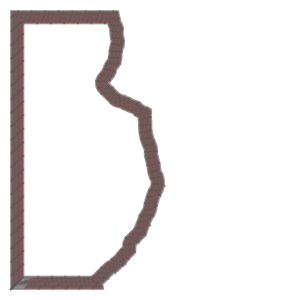

In [297]:
shapely.GeometryCollection(list(polys))

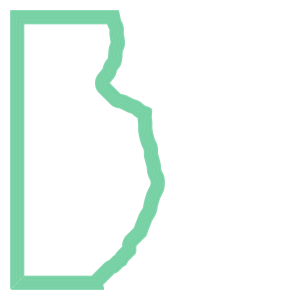

In [298]:
shapely.GeometryCollection(list(rings))

In [299]:
for p in rings: print(p.length)

3302.0
2953.2742628051137
2901.4565291782537
2859.1586657809908
2817.8454246710317
2777.3061135331322
2737.7672988496415
2698.5782148812723
2659.761682776573
2621.191709334371


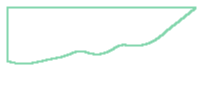

In [243]:
p = rings[0]
p

In [247]:
p.

True

In [242]:
rings[0].xy

(array('d', [7.0, 25.0, 25.0, 30.0, 30.0, 35.0, 35.0, 39.0, 39.0, 44.0, 44.0, 49.0, 49.0, 54.0, 54.0, 57.0, 57.0, 60.0, 60.0, 63.0, 63.0, 65.0, 65.0, 68.0, 68.0, 78.0, 78.0, 81.0, 81.0, 86.0, 86.0, 93.0, 93.0, 97.0, 97.0, 100.0, 100.0, 102.0, 102.0, 104.0, 104.0, 106.0, 106.0, 107.0, 107.0, 109.0, 109.0, 111.0, 111.0, 115.0, 115.0, 118.0, 118.0, 135.0, 135.0, 139.0, 139.0, 142.0, 142.0, 144.0, 144.0, 146.0, 146.0, 148.0, 148.0, 149.0, 149.0, 151.0, 151.0, 152.0, 152.0, 153.0, 153.0, 155.0, 155.0, 156.0, 156.0, 157.0, 157.0, 158.0, 158.0, 159.0, 159.0, 160.0, 160.0, 162.0, 162.0, 163.0, 163.0, 164.0, 164.0, 165.0, 165.0, 167.0, 167.0, 168.0, 168.0, 169.0, 169.0, 171.0, 171.0, 172.0, 172.0, 173.0, 173.0, 174.0, 174.0, 176.0, 176.0, 177.0, 177.0, 178.0, 178.0, 179.0, 179.0, 181.0, 181.0, 182.0, 182.0, 183.0, 183.0, 184.0, 184.0, 186.0, 186.0, 187.0, 187.0, 188.0, 188.0, 0.0, 0.0, 3.0, 3.0, 7.0, 7.0]),
 array('d', [150.0, 150.0, 151.0, 151.0, 152.0, 152.0, 153.0, 153.0, 154.0, 154.0, 155.0

In [142]:
p = polys[200]
p.exterior.xy

(array('d', [-15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -15.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -20.0, -15.0]),
 array('d', [400.0, 401.0, 402.0, 403.0, 404.0, 405.0, 406.0, 407.0, 408.0, 409.0, 410.0, 411.0, 412.0, 413.0, 414.0, 415.0, 416.0, 417.0, 418.0, 419.0, 420.0, 421.0, 422.0, 423.0, 424.0, 425.0, 426.0, 427.0, 428.0, 429.0, 430.0, 431.0, 432.0, 433.0, 434.0, 435.0, 436.0,

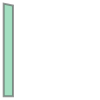

In [143]:
p

In [144]:
def has_valid_coords(poly, x_max, y_max):
    xs, ys = poly.exterior.xy
    xs, ys = np.asarray(xs), np.asarray(ys)
    
    if not xs.max() > 0:
        return False
    if not ys.max() > 0:
        return False
    if not xs.min() < x_max:
        return False
    if not ys.min() < y_max:
        return False

    return True

In [145]:
ymax, xmax = region_to_grid[region_id]['grid_labeled_regions_filtered'].shape
has_valid_coords(p, xmax, ymax)

False

In [122]:
list(zip(*rings[0].xy))

[(0.0, 0.0),
 (0.0, 1024.0),
 (394.0, 1024.0),
 (394.0, 1020.0),
 (395.0, 1020.0),
 (395.0, 1015.0),
 (396.0, 1015.0),
 (396.0, 1011.0),
 (397.0, 1011.0),
 (397.0, 1006.0),
 (398.0, 1006.0),
 (398.0, 1001.0),
 (399.0, 1001.0),
 (399.0, 996.0),
 (400.0, 996.0),
 (400.0, 991.0),
 (401.0, 991.0),
 (401.0, 988.0),
 (402.0, 988.0),
 (402.0, 985.0),
 (403.0, 985.0),
 (403.0, 983.0),
 (404.0, 983.0),
 (404.0, 981.0),
 (405.0, 981.0),
 (405.0, 979.0),
 (406.0, 979.0),
 (406.0, 977.0),
 (407.0, 977.0),
 (407.0, 975.0),
 (408.0, 975.0),
 (408.0, 972.0),
 (409.0, 972.0),
 (409.0, 970.0),
 (410.0, 970.0),
 (410.0, 966.0),
 (411.0, 966.0),
 (411.0, 960.0),
 (412.0, 960.0),
 (412.0, 949.0),
 (411.0, 949.0),
 (411.0, 940.0),
 (412.0, 940.0),
 (412.0, 932.0),
 (413.0, 932.0),
 (413.0, 927.0),
 (414.0, 927.0),
 (414.0, 922.0),
 (415.0, 922.0),
 (415.0, 915.0),
 (416.0, 915.0),
 (416.0, 901.0),
 (415.0, 901.0),
 (415.0, 896.0),
 (414.0, 896.0),
 (414.0, 893.0),
 (413.0, 893.0),
 (413.0, 890.0),
 (412.0,

In [123]:
list(zip(*rings[1].xy))

[(-5.0, 0.0),
 (-5.0, 1024.0),
 (-4.97592363, 1024.4900857),
 (-4.9039264, 1024.97545161),
 (-4.78470168, 1025.45142339),
 (-4.61939766, 1025.91341716),
 (-4.40960632, 1026.35698368),
 (-4.15734806, 1026.77785117),
 (-3.86505227, 1027.17196642),
 (-3.53553391, 1027.53553391),
 (-3.17196642, 1027.86505227),
 (-2.77785117, 1028.15734806),
 (-2.35698368, 1028.40960632),
 (-1.91341716, 1028.61939766),
 (-1.45142339, 1028.78470168),
 (-0.97545161, 1028.9039264),
 (-0.4900857, 1028.97592363),
 (0.0, 1029.0),
 (394.0, 1029.0),
 (394.4900857, 1028.97592363),
 (394.97545161, 1028.9039264),
 (395.45142339, 1028.78470168),
 (395.91341716, 1028.61939766),
 (396.35698368, 1028.40960632),
 (396.77785117, 1028.15734806),
 (397.17196642, 1027.86505227),
 (397.53553391, 1027.53553391),
 (397.86505227, 1027.17196642),
 (398.15734806, 1026.77785117),
 (398.40960632, 1026.35698368),
 (398.61939766, 1025.91341716),
 (398.78470168, 1025.45142339),
 (398.9039264, 1024.97545161),
 (398.97592363, 1024.4900857)

In [176]:
metric_df

,region_bbox-0,region_bbox-1,region_bbox-2,region_bbox-3,region_area,region_perimeter,region_centroid-0,region_centroid-1,region_eccentricity,region_extent,...,region_grid_metrics_SMA_fraction_positive,region_grid_metrics_SMA_integrity,region_grid_metrics_SMA_mean_thickness,region_grid_metrics_SMA_mean_thickness_nonbreaks,region_grid_metrics_combined_num_pieces,region_grid_metrics_combined_overlap_fraction,region_grid_metrics_combined_fraction_positive,region_grid_metrics_combined_integrity,region_grid_metrics_combined_mean_thickness,region_grid_metrics_combined_mean_thickness_nonbreaks
1,0,0,1024,563,476792,3034.98189,500.557811,237.366332,0.861507,0.827029,...,0.244444,0.985915,2.443662,2.478571,4,0.244444,0.244444,0.985915,2.443662,2.478571


In [38]:
img = np.load('/diskmnt/Projects/Users/estorrs/multiplex_data/analysis/dcis_region_analysis/angelo_v1/region_mask.npy')
img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int16)

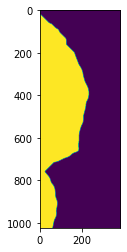

In [39]:
plt.imshow(img)

In [40]:
from mip.region_analysis import mask_to_polygon
ring = mask_to_polygon(img).exterior

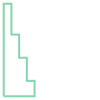

In [41]:
ring